<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/Small_multiples_disruptionsbydisruptioncategories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# @title
!pwd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

/content


### **data cleaning**

In [ ]:
# @title
#importing data from github. switched from google drive.
url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-beta.csv' # Changed url to raw data url
df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,Unnamed: 8,cid,...,Disruption labor produced.2,affect-goal,change,Goal changes,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,NaN,circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,NaN,circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,NaN,circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,NaN,circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,NaN,circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)


In [ ]:
# @title
df['pid*gid'] = df['pid'] + "*" + df['gid']

In [ ]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption")
    #or(x['disruption_labor_aggregated'] in ["No labor- positive disruption"])
    or (x['how-long'] in ["No disruption"])
    else 'Disruption', axis=1)

df

,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,affect-logistical,disruption_labor_produced,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal,change,goal_changes,disruption_labor_aggregated,pid*gid,disruption_status
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,Long term,NaN,...,NaN,Logistical,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,Logistical,S01*goal1,Disruption
1,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,Long term,NaN,...,NaN,Emotional,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,Emotional,S01*goal1,Disruption
2,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,Long term,NaN,...,NaN,Physical,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,Physical,S01*goal1,Disruption
3,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,Aspirational,r1,...,NaN,Emotional,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,Emotional,S01*goal2,Disruption
4,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,Aspirational,r2,...,NaN,Emotional,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,Emotional,S01*goal2,Disruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ2,S149goal1circ2,Long term,NaN,...,"none, I had no choice. I tried looking for che...",Emotional,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,"Emotional, Financial, Logistical",S149*goal1,Disruption
758,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ3,S149goal1circ3,Long term,NaN,...,na,Emotional,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed time,Emotional,S149*goal1,Disruption
759,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ4,S149goal1circ4,Long term,NaN,...,na,Emotional,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed time,Emotional,S149*goal1,Disruption
760,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Physical Activity,circ1,S149goal2circ1,Medium term,NaN,...,I had to mostly work out my arms and core and ...,Physical,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Changed strategy,"Physical, Emotional",S149*goal2,Disruption


# number of disruptions under disruption categories

combining certain disruption categories for analysis and manuscript

In [ ]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
temp_df = disruption_data

# combining categories and renaming labels to differentiate from goal categories
temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
    'Internal-Skills': 'Emotional and cognitive disruptions',
    'Internal - Feelings and thoughts': 'Emotional and cognitive disruptions',
    'Social interaction - other': 'Social interaction disruptions',
    'Social interactions - negative': 'Social interaction disruptions',
    'Pain': 'Health disruptions',
     'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Entertainment': 'Leisure disruptions',
    'Travel': 'Leisure disruptions',
    'Housework': 'Family and home responsibilities disruptions',
    'Caregiving': 'Family and home responsibilities disruptions',
    'Transportation': 'Resources disruptions',
    'Finances': 'Financial disruptions',
    'Work': 'Employment disruptions', #work or job related activities
    'Employment': 'Financial disruptions', # most similar to financial disruptions
    'Other': 'Other disruptions',
    'Resources': 'Resources disruptions',
    'Health': 'Health disruptions',
    'Weather' : 'Weather disruptions'

})
pivot_table = temp_df.pivot_table(
    index='situation_that_occurred',
    aggfunc='size',
    fill_value=0
)

pivot_table = pivot_table.reset_index()
pivot_table.rename(columns={0: 'count_disruptions'}, inplace=True)
pivot_table.sort_values(by='count_disruptions', ascending=False, inplace=True)
pivot_table


# Calculate the total count
#total_count = pivot_table['non-unique #situations reported'].sum()

# Create a new DataFrame for the total row
#total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'non-unique #situations reported': [total_count]})

# Concatenate the original DataFrame and the total row
#pivot_table = pd.concat([pivot_table, total_row], ignore_index=True)


<ipython-input-7-f42693cedba4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({


,situation_that_occurred,count_disruptions
0,Emotional and cognitive disruptions,147
3,Financial disruptions,137
4,Health disruptions,104
8,Social interaction disruptions,97
1,Employment disruptions,75
7,Resources disruptions,68
5,Leisure disruptions,35
2,Family and home responsibilities disruptions,22
9,Weather disruptions,22
6,Other disruptions,16


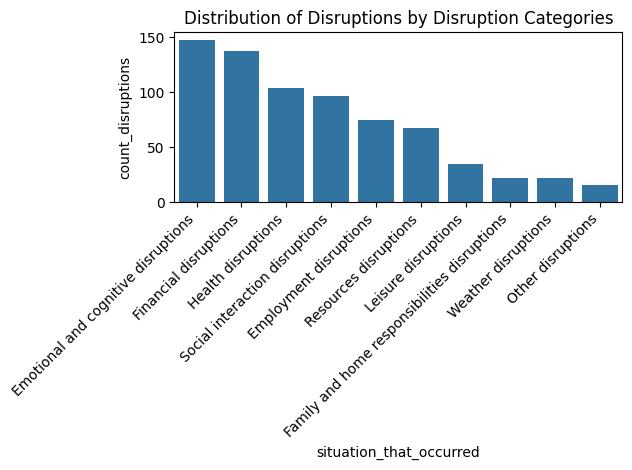

In [ ]:
# @title
sns.barplot(x='situation_that_occurred', y='count_disruptions', data=pivot_table)
plt.title('Distribution of Disruptions by Disruption Categories')
plt.xticks(rotation=45,ha='right')

plt.tight_layout()
plt.show()

## number of people who reported disruption for each disruption category

In [ ]:
# @title
df_disruptioncategories = df[['pid', 'situation_that_occurred', 'disruption_status']]

# drop duplicates
df_disruptioncategories = df_disruptioncategories[['pid','situation_that_occurred']].drop_duplicates()

#combining and renaming disruptions categories
df_disruptioncategories['situation_that_occurred'] = df_disruptioncategories['situation_that_occurred'].replace({
      'Internal-Skills': 'Emotional and cognitive disruptions',
    'Internal - Feelings and thoughts': 'Emotional and cognitive disruptions',
    'Social interaction - other': 'Social interaction disruptions',
    'Social interactions - negative': 'Social interaction disruptions',
    'Pain': 'Health disruptions',
     'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Entertainment': 'Leisure disruptions',
    'Travel': 'Leisure disruptions',
    'Housework': 'Family and home responsibilities disruptions',
    'Caregiving': 'Family and home responsibilities disruptions',
    'Transportation': 'Resources disruptions',
    'Finances': 'Financial disruptions',
    'Work': 'Employment disruptions',
    'Employment': 'Employment disruptions',
    'Other': 'Other disruptions',
    'Resources': 'Resources disruptions',
    'Health': 'Health disruptions',
    'Weather' : 'Weather disruptions'
})

# prompt: dataframe with count of pid for goal_categories in disruption_by_category

disruption_pid_count = df_disruptioncategories.groupby('situation_that_occurred')['pid'].nunique().reset_index()
disruption_pid_count = disruption_pid_count.rename(columns={'pid': 'count_participants'})
disruption_pid_count

,situation_that_occurred,count_participants
0,Emotional and cognitive disruptions,70
1,Employment disruptions,64
2,Family and home responsibilities disruptions,18
3,Financial disruptions,66
4,Health disruptions,73
5,Leisure disruptions,25
6,No disruption,26
7,Other disruptions,12
8,Resources disruptions,52
9,Social interaction disruptions,63


In [ ]:
# Merge the two dataframes on the 'situation_that_occurred' column
merged_df = pivot_table.merge(disruption_pid_count, on='situation_that_occurred', how='left')

# Fill NaN values in the 'count_participants' column with 0
merged_df['count_participants'] = merged_df['count_participants'].fillna(0)
merged_df

,situation_that_occurred,count_disruptions,count_participants
0,Emotional and cognitive disruptions,147,70
1,Financial disruptions,137,66
2,Health disruptions,104,73
3,Social interaction disruptions,97,63
4,Employment disruptions,75,64
5,Resources disruptions,68,52
6,Leisure disruptions,35,25
7,Family and home responsibilities disruptions,22,18
8,Weather disruptions,22,20
9,Other disruptions,16,12


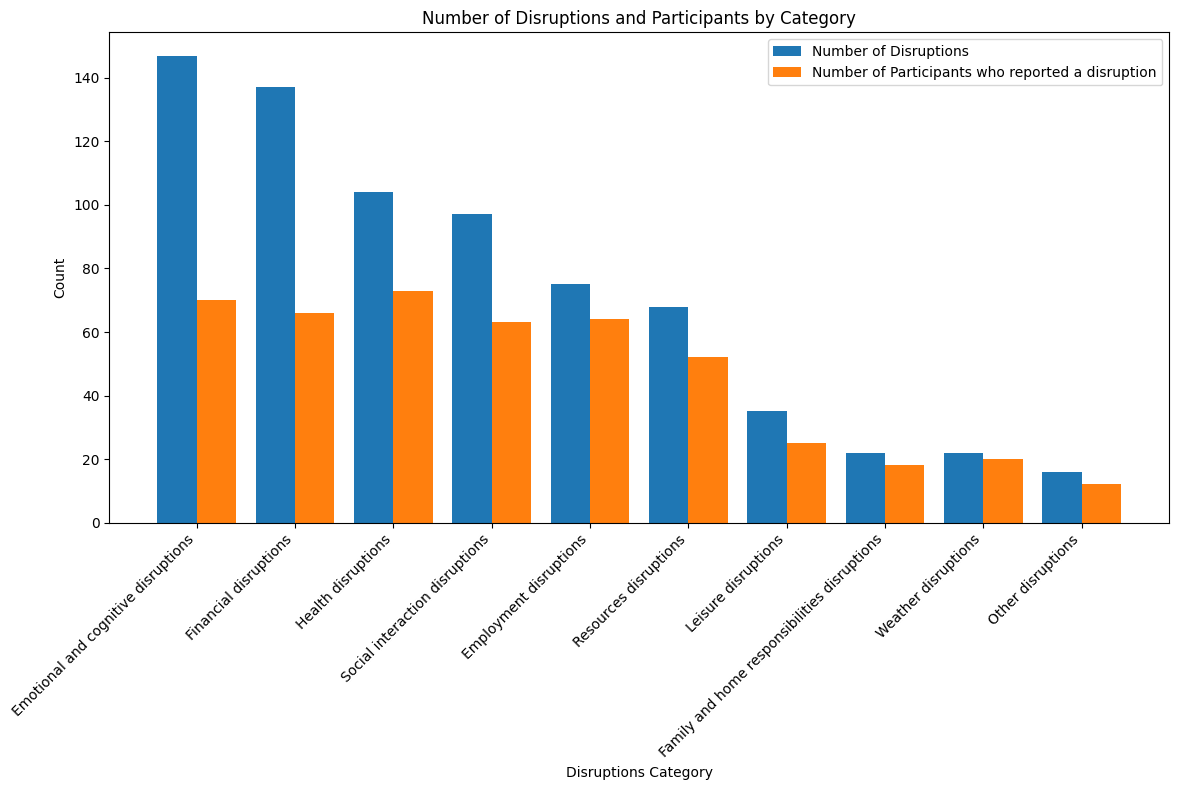

In [ ]:
# prompt: plot combined_df using multiple bar chart or grouped bar chart using matplotlib

import matplotlib.pyplot as plt
import numpy as np


# Assuming combined_df is defined as in your code

fig, ax = plt.subplots(figsize=(12, 8))

width = 0.4  # the width of the bars

X_axis = np.arange(len(merged_df.situation_that_occurred))

ax.bar(X_axis - 0.2, merged_df.count_disruptions, width, label='Number of Disruptions')
ax.bar(X_axis + 0.2, merged_df.count_participants, width, label='Number of Participants who reported a disruption')

# Correctly set tick positions and labels together
tick_positions = range(len(merged_df.situation_that_occurred)) # Manual indexing starting from 0
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels=merged_df.situation_that_occurred, rotation=45,ha='right')

ax.set_xlabel("Disruptions Category")
ax.set_ylabel("Count")
ax.set_title("Number of Disruptions and Participants by Category")
ax.legend()
plt.tight_layout()
plt.show()

# number of disruptions by duration

   how-long  count_disruptions
0   >1 year                101
1    <1 day                208
2   <1 week                170
3   <1 year                117
4  <1 month                112


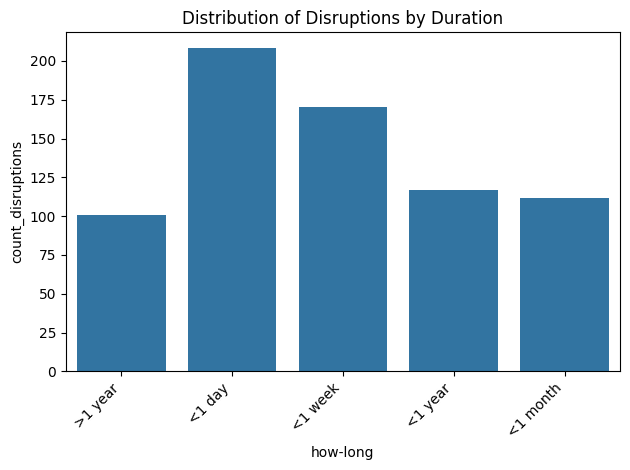

In [ ]:
# prompt: count of disruptions based on how-long
disruption_data = df[df['disruption_status'] == 'Disruption']
# filter out no responses
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']

temp_df = disruption_data

#grouping durations
temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'more than half a day to a day',
    'more than an hour to half a day': 'more than half a day to a day',
})


# Group by 'how-long' and count the number of disruptions
disruption_duration_count = temp_df.groupby('how-long')['pid'].count().reset_index()
disruption_duration_count = disruption_duration_count.rename(columns={'pid': 'count_disruptions'})

# Rename the label names for clarity
disruption_duration_count['how-long'] = disruption_duration_count['how-long'].replace({
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

# Display the result
print(disruption_duration_count)

# You can also visualize this using a bar plot:
sns.barplot(x='how-long', y='count_disruptions', data=disruption_duration_count)
plt.title('Distribution of Disruptions by Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## num of disruptions by duration for each disruption category

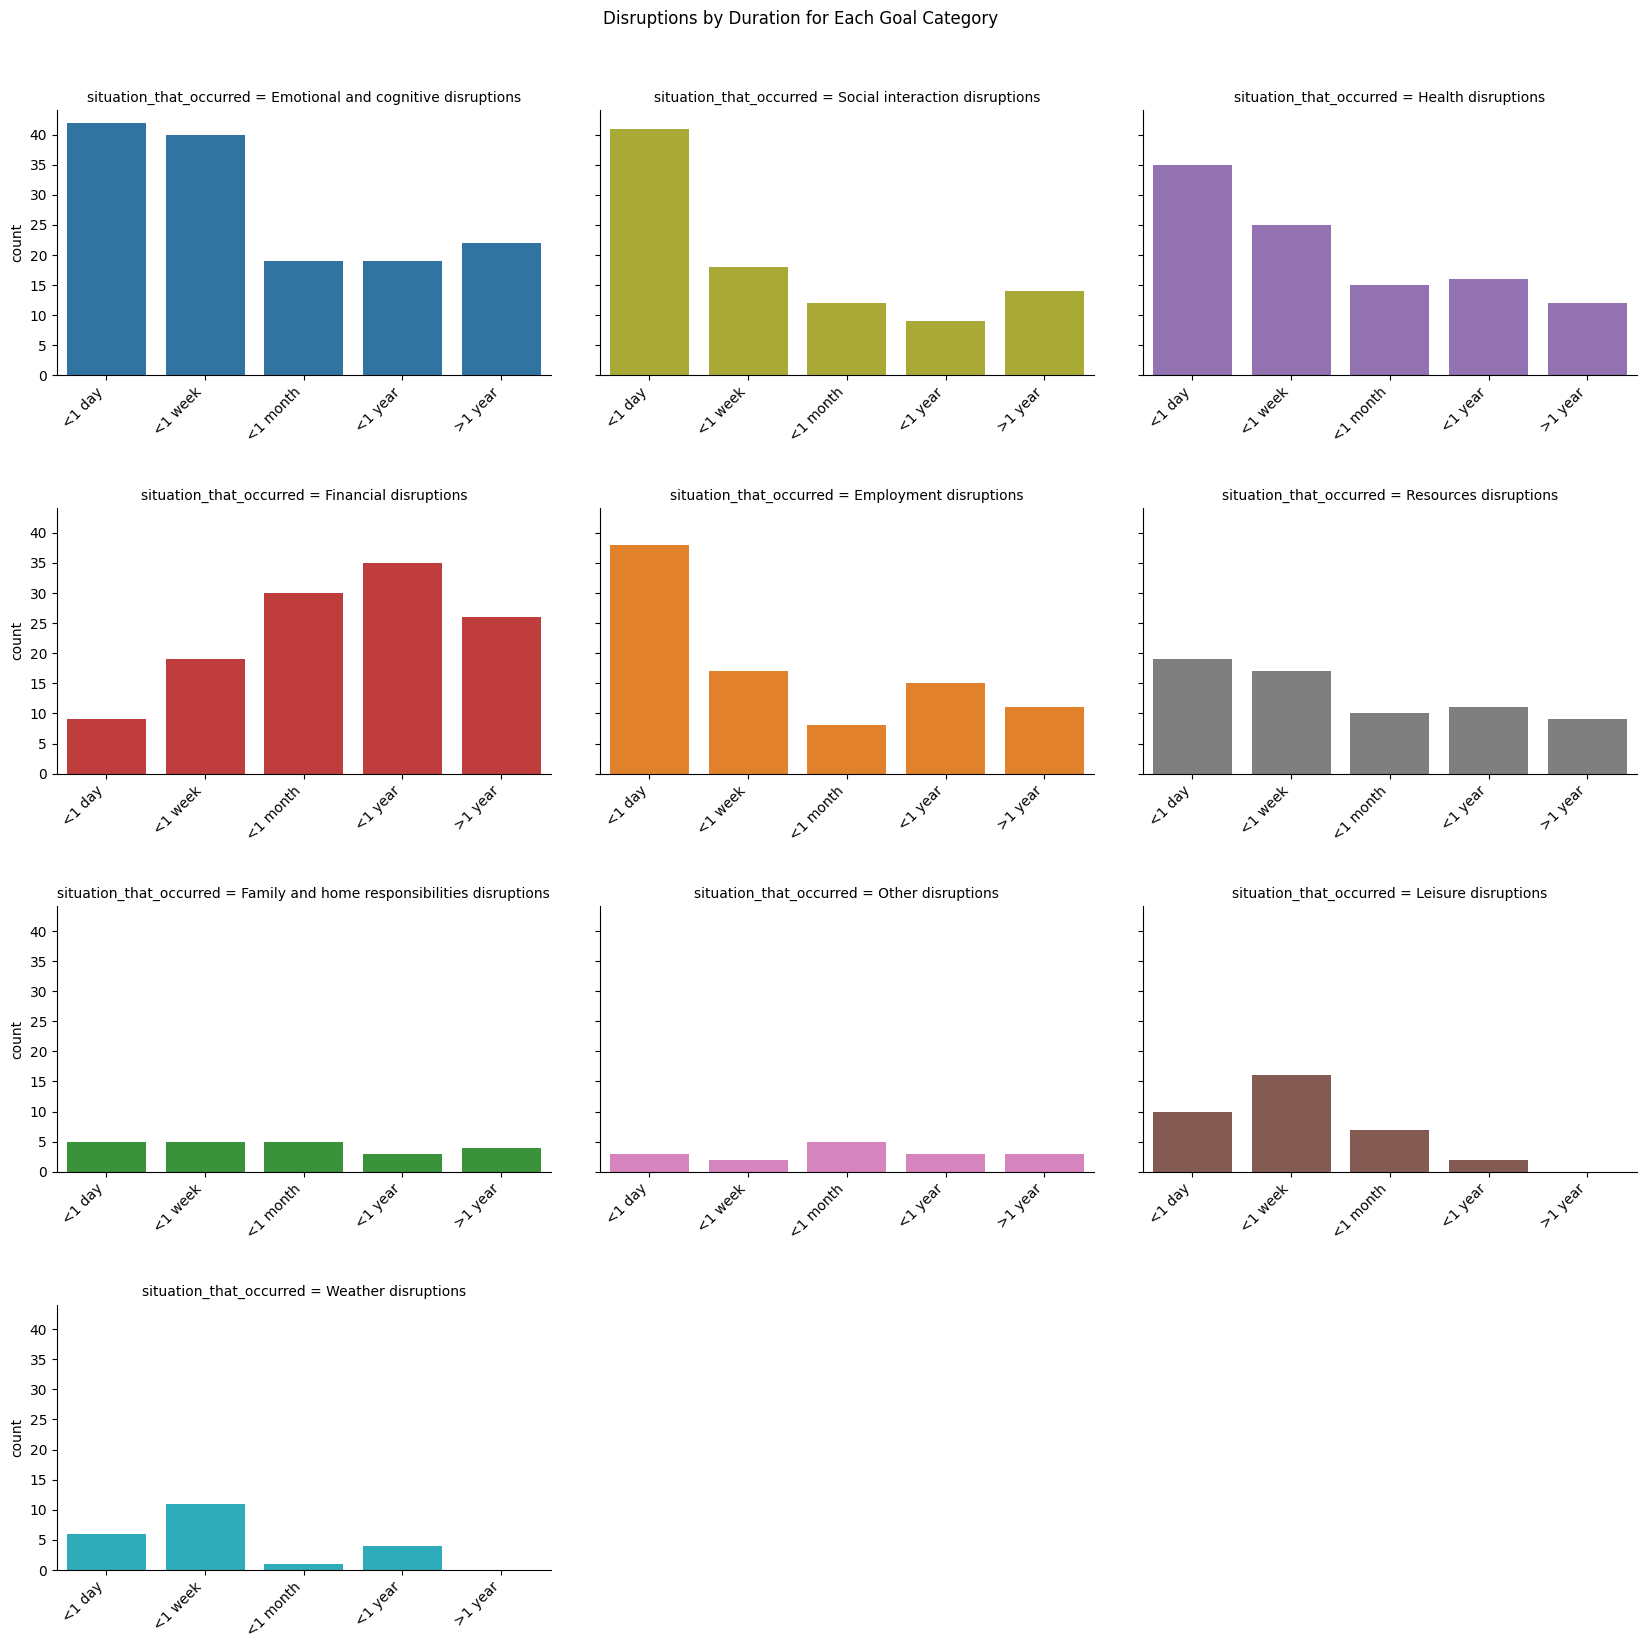

In [ ]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
# filter out no responses
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
# disruption_data = disruption_data.drop_duplicates(subset = ['pid*gid*cid'])

temp_df = disruption_data

#grouping durations
temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'more than half a day to a day',
    'more than an hour to half a day': 'more than half a day to a day',
})

# grouping disruption categories

temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
      'Internal-Skills': 'Emotional and cognitive disruptions',
    'Internal - Feelings and thoughts': 'Emotional and cognitive disruptions',
    'Social interaction - other': 'Social interaction disruptions',
    'Social interactions - negative': 'Social interaction disruptions',
    'Pain': 'Health disruptions',
     'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Entertainment': 'Leisure disruptions',
    'Travel': 'Leisure disruptions',
    'Housework': 'Family and home responsibilities disruptions',
    'Caregiving': 'Family and home responsibilities disruptions',
    'Transportation': 'Resources disruptions',
    'Finances': 'Financial disruptions',
    'Work': 'Employment disruptions',
    'Employment': 'Employment disruptions',
    'Other': 'Other disruptions',
    'Resources': 'Resources disruptions',
    'Health': 'Health disruptions',
    'Weather' : 'Weather disruptions'
})

disruption_data = temp_df
disruption_duration_by_situation = disruption_data.groupby(['situation_that_occurred', 'how-long']).size()
count_disruptions_df=disruption_duration_by_situation.reset_index(name='count')



# Rename the label names for clarity
count_disruptions_df['how-long'] = count_disruptions_df['how-long'].replace({
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

# get label and set order
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_disruptions_df['how-long'] = pd.Categorical(count_disruptions_df['how-long'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Emotional and cognitive disruptions', 'Social interaction disruptions', 'Health disruptions', 'Financial disruptions', 'Employment disruptions', 'Resources disruptions','Family and home responsibilities disruptions', 'Other disruptions','Leisure disruptions', 'Weather disruptions']


# # Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='situation_that_occurred', data=count_disruptions_df, kind='bar', col='situation_that_occurred', col_wrap=3, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()



## count of disruptions by frequency

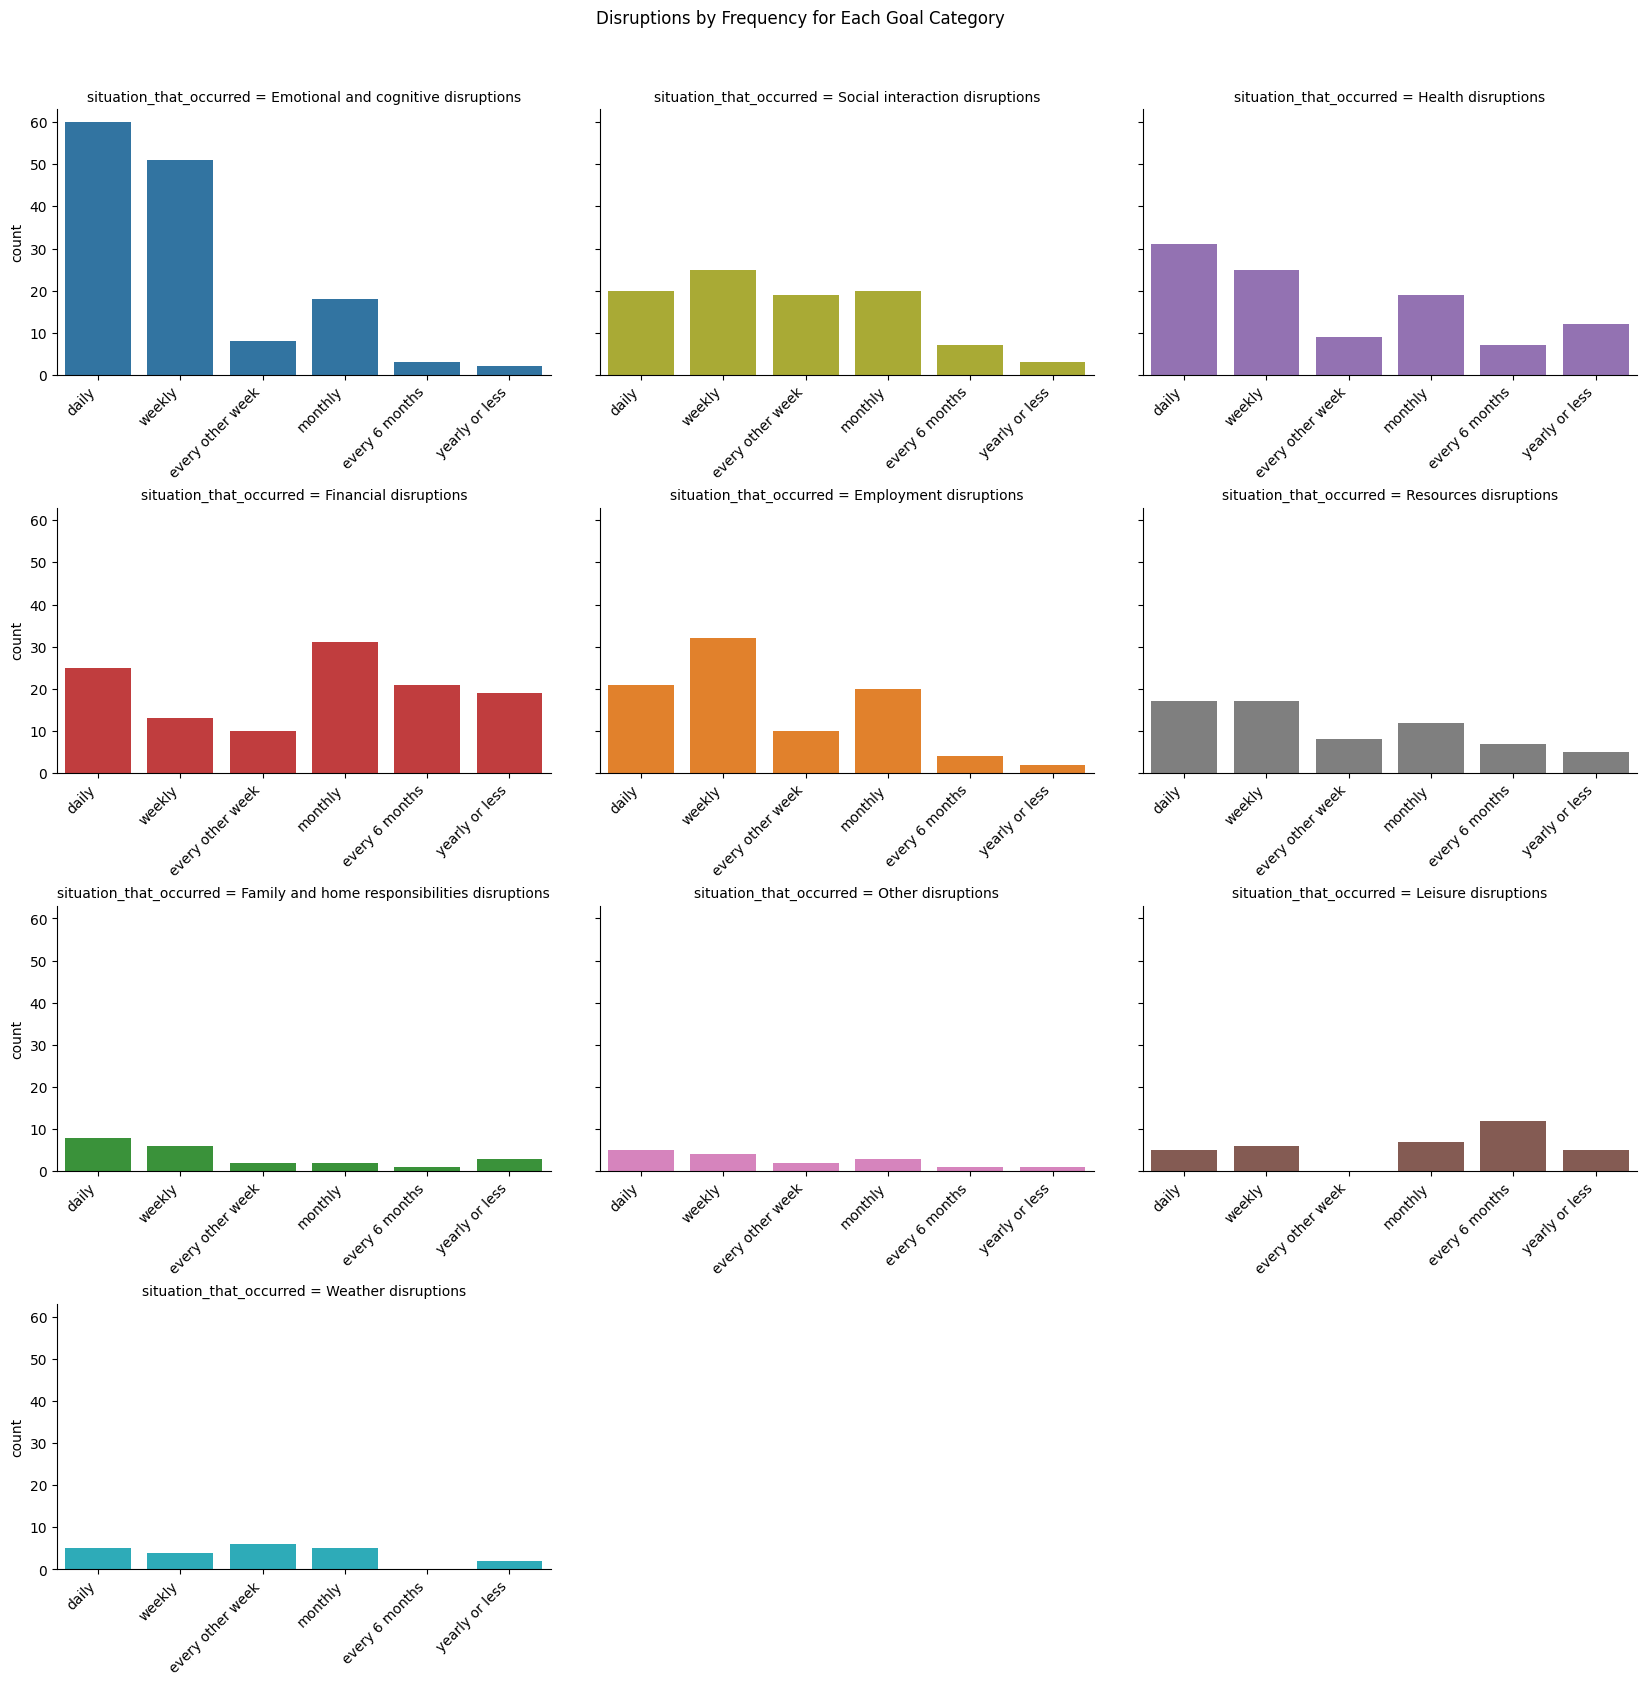

In [ ]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
# filter out no responses
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']
# disruption_data = disruption_data.drop_duplicates(subset = ['pid*gid*cid'])

temp_df = disruption_data

# grouping disruption categories

temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
      'Internal-Skills': 'Emotional and cognitive disruptions',
    'Internal - Feelings and thoughts': 'Emotional and cognitive disruptions',
    'Social interaction - other': 'Social interaction disruptions',
    'Social interactions - negative': 'Social interaction disruptions',
    'Pain': 'Health disruptions',
     'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Entertainment': 'Leisure disruptions',
    'Travel': 'Leisure disruptions',
    'Housework': 'Family and home responsibilities disruptions',
    'Caregiving': 'Family and home responsibilities disruptions',
    'Transportation': 'Resources disruptions',
    'Finances': 'Financial disruptions',
    'Work': 'Employment disruptions',
    'Employment': 'Employment disruptions',
    'Other': 'Other disruptions',
    'Resources': 'Resources disruptions',
    'Health': 'Health disruptions',
    'Weather' : 'Weather disruptions'
})

disruption_data = temp_df
disruption_duration_by_situation = disruption_data.groupby(['situation_that_occurred', 'frequency']).size()
count_disruptions_df=disruption_duration_by_situation.reset_index(name='count')




#set order of plots
plot_order = ['Emotional and cognitive disruptions', 'Social interaction disruptions', 'Health disruptions', 'Financial disruptions', 'Employment disruptions', 'Resources disruptions','Family and home responsibilities disruptions', 'Other disruptions','Leisure disruptions', 'Weather disruptions']


# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_disruptions_df['frequency'] = pd.Categorical(count_disruptions_df['frequency'], categories=xlabels_order, ordered=True)

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='situation_that_occurred', data=count_disruptions_df, kind='bar', col='situation_that_occurred', col_wrap=3, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()



## disruptions by burden for disruption types

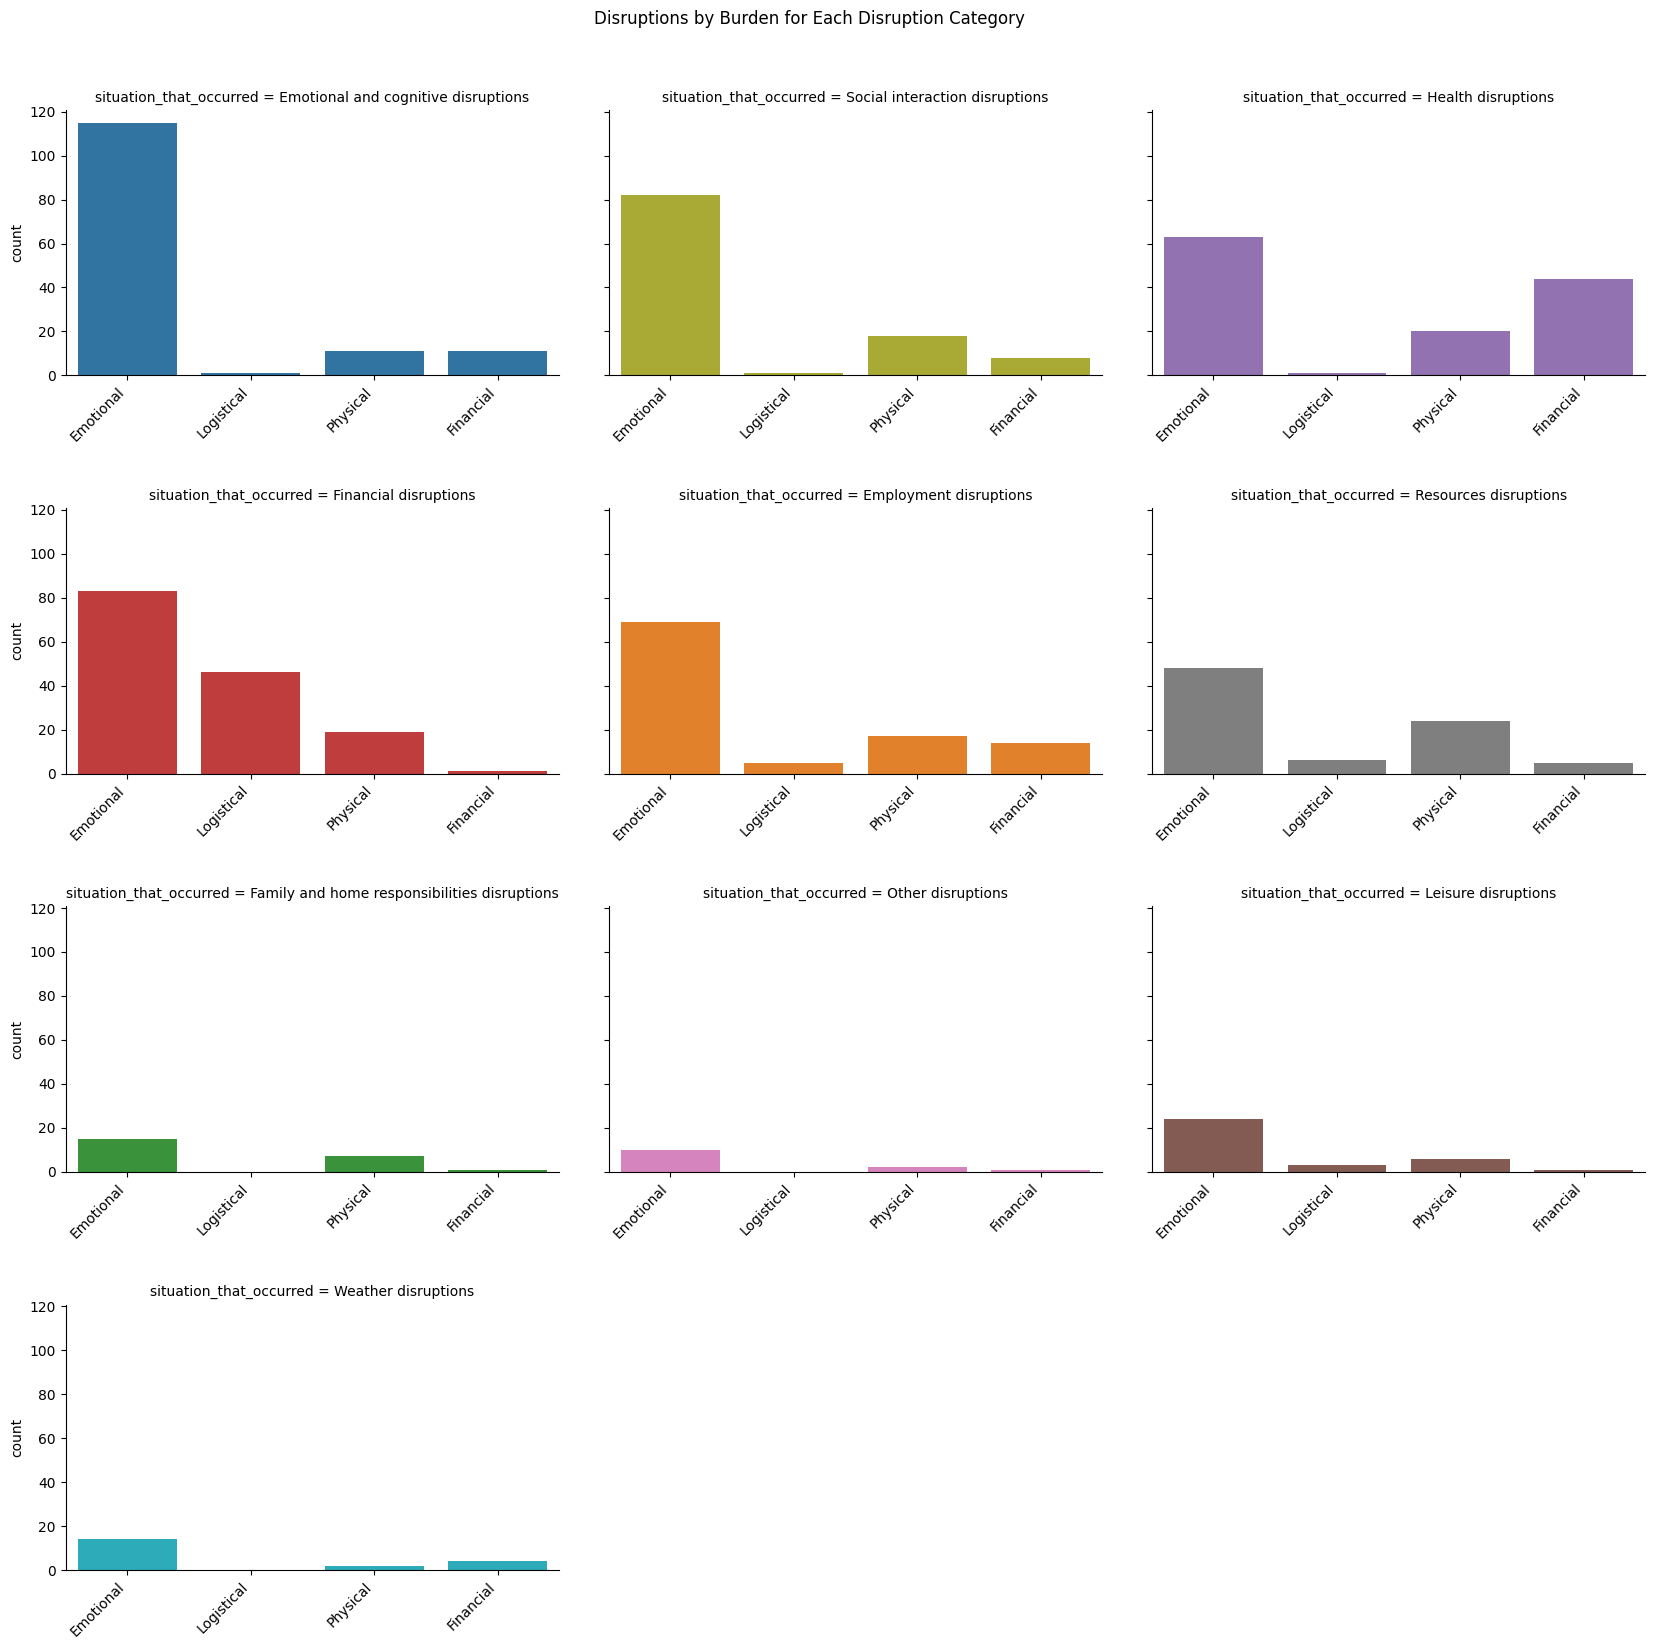

In [ ]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
# explode this column to ensure each disruption labor type is in a single row

survey_data_exploded = disruption_data.assign(disruption_labor_split=disruption_data['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
survey_data_exploded = survey_data_exploded[~survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]


temp_df = survey_data_exploded

# grouping disruption categories

temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
      'Internal-Skills': 'Emotional and cognitive disruptions',
    'Internal - Feelings and thoughts': 'Emotional and cognitive disruptions',
    'Social interaction - other': 'Social interaction disruptions',
    'Social interactions - negative': 'Social interaction disruptions',
    'Pain': 'Health disruptions',
     'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Entertainment': 'Leisure disruptions',
    'Travel': 'Leisure disruptions',
    'Housework': 'Family and home responsibilities disruptions',
    'Caregiving': 'Family and home responsibilities disruptions',
    'Transportation': 'Resources disruptions',
    'Finances': 'Financial disruptions',
    'Work': 'Employment disruptions',
    'Employment': 'Employment disruptions',
    'Other': 'Other disruptions',
    'Resources': 'Resources disruptions',
    'Health': 'Health disruptions',
    'Weather' : 'Weather disruptions'
})

# Group by disruption type and count the number of values
count_by_disruption_burden = temp_df.groupby(['situation_that_occurred', 'disruption_labor_split'])['pid'].count()
count_disruptions_df=count_by_disruption_burden.reset_index(name='count')




#set order of plots
plot_order = ['Emotional and cognitive disruptions', 'Social interaction disruptions', 'Health disruptions', 'Financial disruptions', 'Employment disruptions', 'Resources disruptions','Family and home responsibilities disruptions', 'Other disruptions','Leisure disruptions', 'Weather disruptions']


# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']

count_disruptions_df['disruption_labor_split'] = pd.Categorical(count_disruptions_df['disruption_labor_split'])

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='situation_that_occurred', data=count_disruptions_df, kind='bar', col='situation_that_occurred', col_wrap=3, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Burden for Each Disruption Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

